## scikit-learn中的多项式回归和pipeline
> **degree参数表明是假设几次多项式回归**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-3, 3, size=100) # -3 到 3之间随机取值 
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

---
前处理

In [3]:
from sklearn.preprocessing import PolynomialFeatures# 导入类，使用方法与之前归一化相同

In [4]:
poly = PolynomialFeatures(degree=2) #添加之后的总特征 x^2项

In [5]:
poly.fit(X) #训练
X2 = poly.transform(X) #将之后的特征转换为

In [6]:
X2.shape

(100, 3)

In [8]:
X2[:5, :] # 1， x, x^2

array([[ 1.        , -1.82122022,  3.3168431 ],
       [ 1.        ,  0.48074264,  0.23111349],
       [ 1.        ,  0.53027117,  0.28118751],
       [ 1.        , -1.56292439,  2.44273265],
       [ 1.        , -2.43009034,  5.90533907]])

---
线性回归求解

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

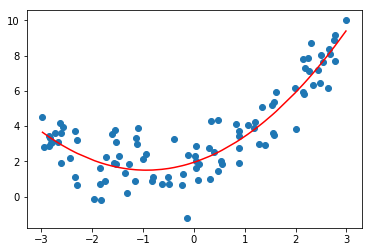

In [11]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [12]:
lin_reg2.coef_ #求解系数

array([0.        , 0.95486074, 0.51431488])

In [13]:
lin_reg2.intercept_ #求解截距

1.9456729386705593

## 关于PolynomialFeatures
> **多元多项式回归 1, x , y, x^2, x*y, y^2**

In [19]:
X = np.arange(1, 11).reshape(-1, 2) #变量相当于多一个，x和y

In [15]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [16]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [17]:
X2 #1, x , y, x^2, xy, y^2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

<img src='./picture/2-1.png'>

## Pipeline 管道
> **多项式特征，数据归一化，线性回归 三位一体**

> **<font color='red'>使用pipeline 封装多项式回归</font>**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-3, 3, size=100) # -3 到 3之间随机取值 
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [22]:
poly_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [23]:
y_predict = poly_reg.predict(X)

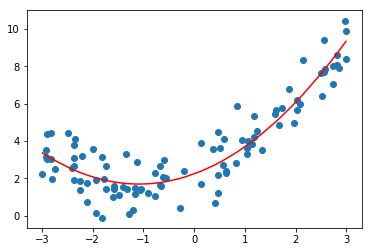

In [25]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()